<a href="https://colab.research.google.com/github/Anshika2110/Gmail-clone/blob/main/CVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Importing the dependencies

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and preprocessing


In [7]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_uci.csv')

In [8]:
# print first 5 rows of the dataset
heart_data.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
# print last 5 rows of thes dataset
heart_data.tail()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [11]:
# number of rows and column in the dataset
heart_data.shape

(920, 16)

In [12]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [13]:
# checking for missing values
heart_data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


Handling missing values by
two ways-imputation (mean, median, mode) and dropping

In [14]:
# analysing the distribution of data in the trestbps
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(heart_data.trestbps)




NameError: name 'plt' is not defined

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-3187524617.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data.trestbps)


<Axes: xlabel='trestbps', ylabel='Density'>

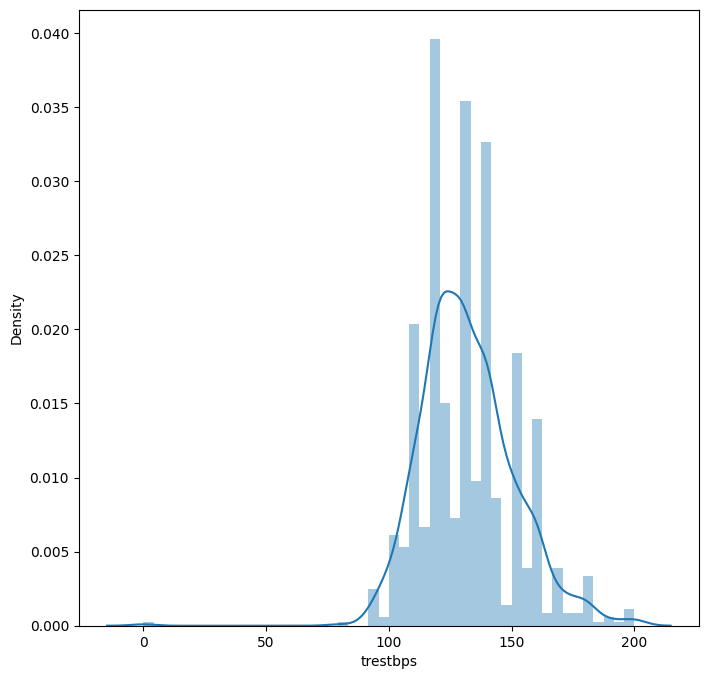

In [18]:
# analysing the distribution of data in the trestbps
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(heart_data.trestbps)

replace the missing values with median value

In [19]:
heart_data['trestbps'].fillna(heart_data['trestbps'].median(),inplace=True)

/tmp/ipython-input-2103407265.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data['trestbps'].fillna(heart_data['trestbps'].median(),inplace=True)


In [20]:
heart_data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,30
fbs,90
restecg,2
thalch,55


/tmp/ipython-input-6541642.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data.chol)


<Axes: xlabel='chol', ylabel='Density'>

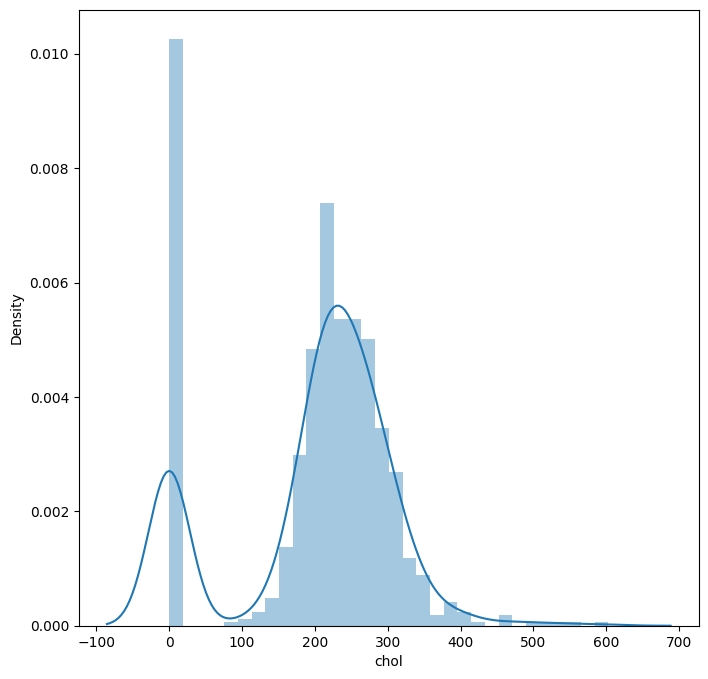

In [21]:
# analysing the distribution of data in the chol
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(heart_data.chol)

In [22]:
heart_data['chol'].fillna(heart_data['chol'].median(),inplace=True)

/tmp/ipython-input-2700735801.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data['chol'].fillna(heart_data['chol'].median(),inplace=True)


/tmp/ipython-input-2264245219.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data.fbs)


<Axes: xlabel='fbs', ylabel='Density'>

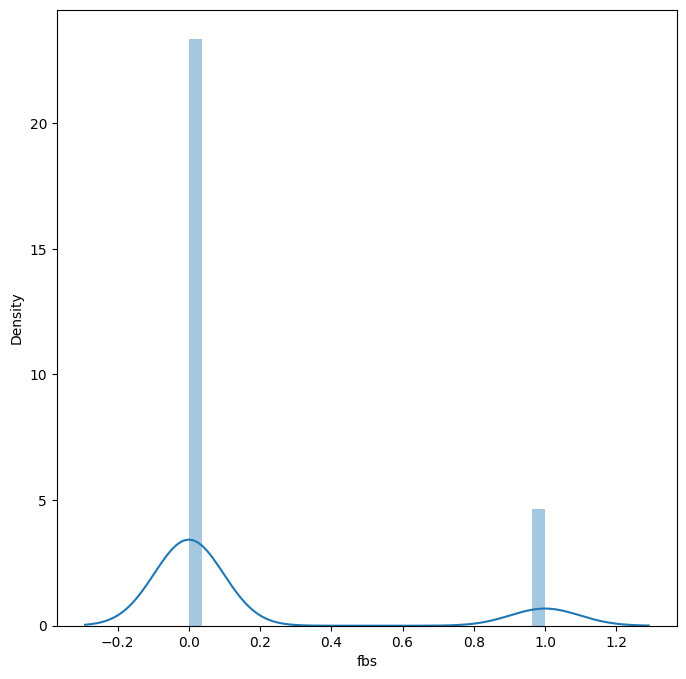

In [23]:
# analysing the distribution of data in the fbs
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(heart_data.fbs)

In [24]:
heart_data['fbs'].fillna(heart_data['fbs'].mode(),inplace=True)

/tmp/ipython-input-2364920427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data['fbs'].fillna(heart_data['fbs'].mode(),inplace=True)


<Axes: xlabel='count', ylabel='restecg'>

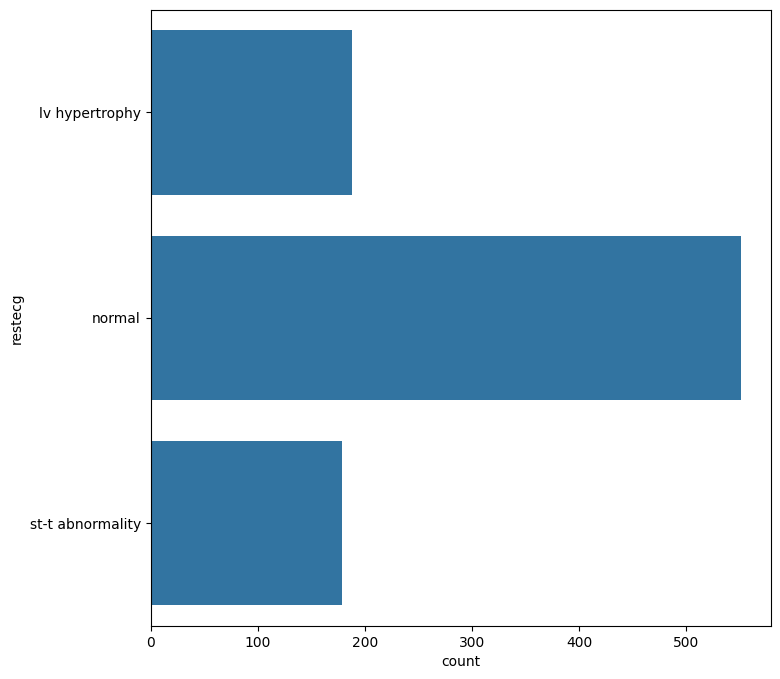

In [27]:
# analysing the distribution of data in the restecg
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(heart_data.restecg)

In [29]:
heart_data['restecg'].fillna(heart_data['restecg'].mode(),inplace=True)

/tmp/ipython-input-2990684967.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data.thalch)


<Axes: xlabel='thalch', ylabel='Density'>

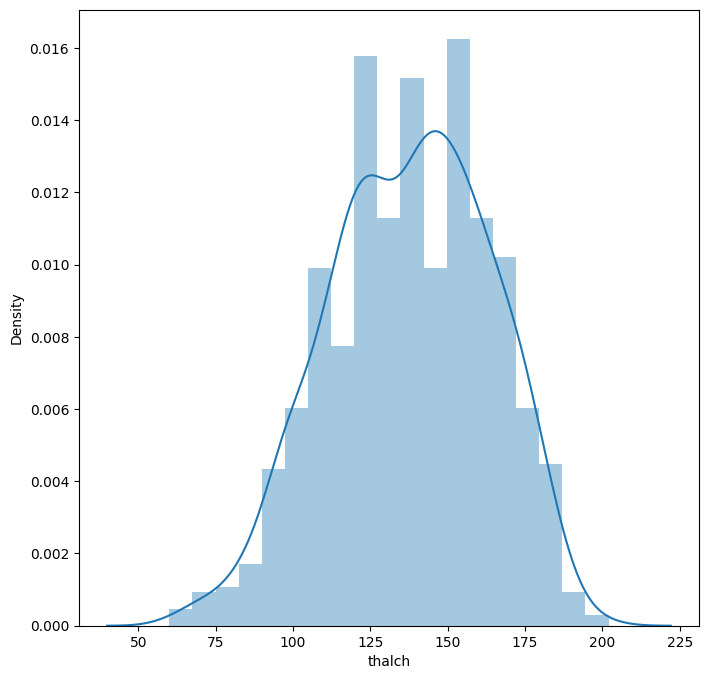

In [30]:
# analysing the distribution of data in the thalch
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(heart_data.thalch)

In [31]:
heart_data['thalch'].fillna(heart_data['thalch'].median(),inplace=True)

/tmp/ipython-input-1796236958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data['thalch'].fillna(heart_data['thalch'].median(),inplace=True)


In [32]:
heart_data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,90
restecg,2
thalch,0


In [33]:
heart_data['fbs'].fillna(heart_data['fbs'].mode()[0],inplace=True)

/tmp/ipython-input-705256486.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_data['fbs'].fillna(heart_data['fbs'].mode()[0],inplace=True)


In [34]:
heart_data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,2
thalch,0


In [35]:
heart_data['restecg'].fillna(heart_data['restecg'].mode()[0],inplace=True)

In [36]:
heart_data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


/tmp/ipython-input-2428688404.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data.exang)


<Axes: xlabel='exang', ylabel='Density'>

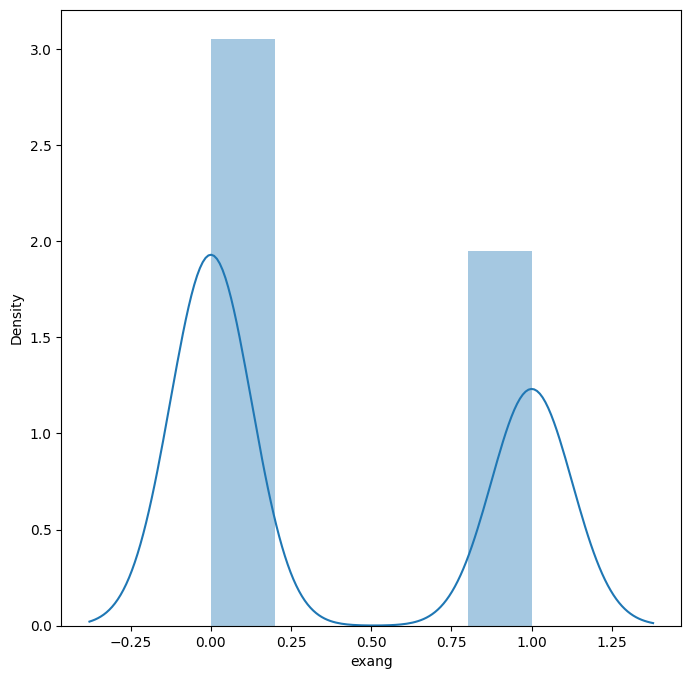

In [37]:
# analysing the distribution of data in the exang
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(heart_data.exang)

In [38]:
heart_data['exang'].fillna(heart_data['exang'].mode()[0],inplace=True)

/tmp/ipython-input-2592979921.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data['exang'].fillna(heart_data['exang'].mode()[0],inplace=True)
/tmp/ipython-input-2592979921.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_data['exang'].fillna(heart_data['exang'].mode()[0],inplace=True)


/tmp/ipython-input-2090739543.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data.oldpeak)


<Axes: xlabel='oldpeak', ylabel='Density'>

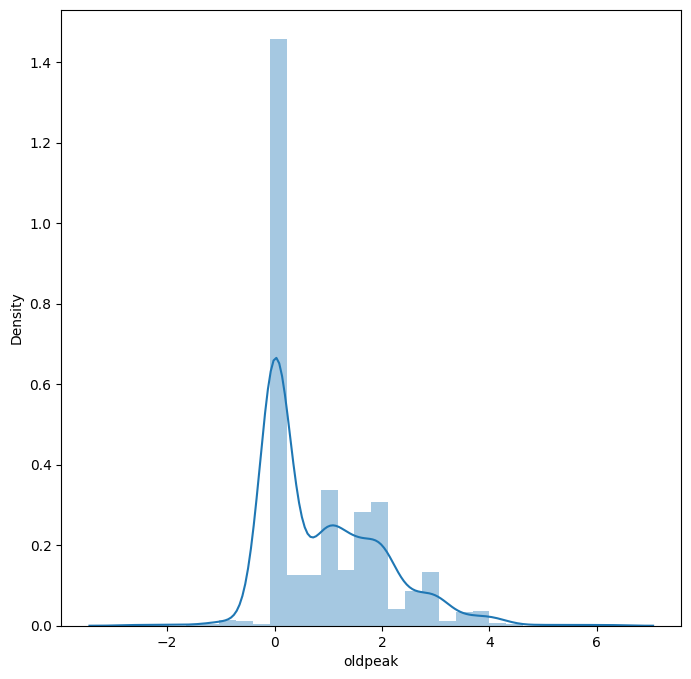

In [39]:
# analysing the distribution of data in the oldpeak
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(heart_data.oldpeak)

In [40]:
heart_data['oldpeak'].fillna(heart_data['oldpeak'].median,inplace=True)

/tmp/ipython-input-1624772287.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0      2.3
1      1.5
2      2.6
3      3.5
4      1.4
      ... 
915    0.0
916    NaN
917    0.0
918    NaN
919    0.0
Name: oldpeak, Length: 920, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  heart_data['oldpeak'].fillna(heart_data['oldpeak'].median,inplace=True)


In [41]:
heart_data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


/tmp/ipython-input-4011638184.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data['slope'].fillna(heart_data['slope'].mode()[0],inplace=True)
/tmp/ipython-input-4011638184.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

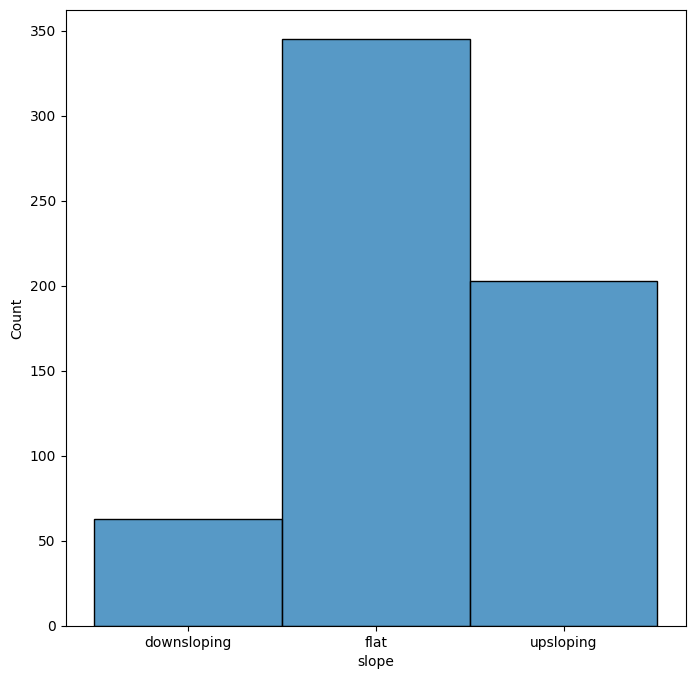

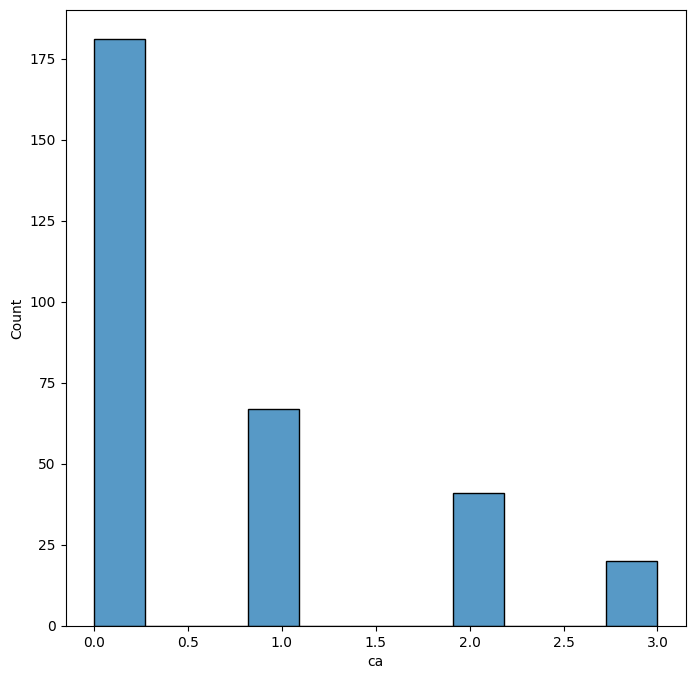

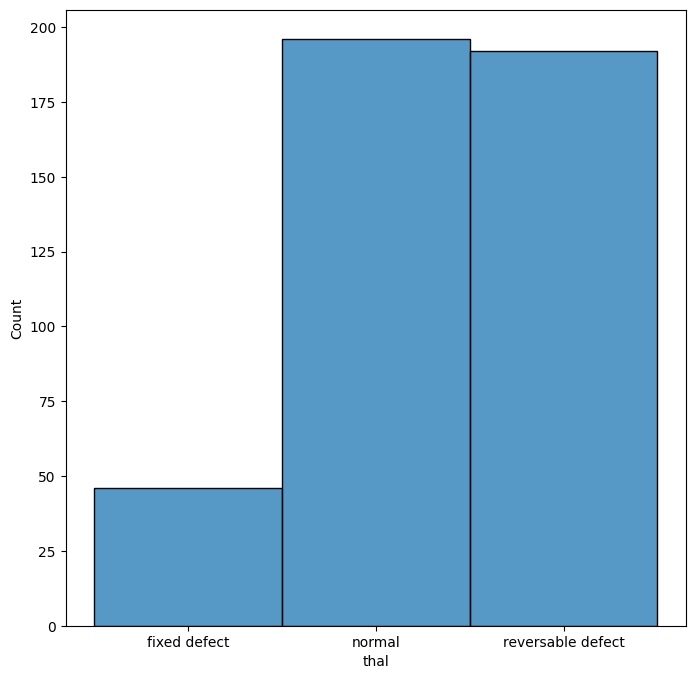

In [43]:
# analysing the distribution of data in the slope
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(heart_data.slope)
heart_data['slope'].fillna(heart_data['slope'].mode()[0],inplace=True)

# analysing the distribution of data in the ca
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(heart_data.ca)
heart_data['ca'].fillna(heart_data['ca'].median(),inplace=True)

# analysing the distribution of data in the thal
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(heart_data.thal)
heart_data['thal'].fillna(heart_data['thal'].mode()[0],inplace=True)

In [44]:
heart_data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [45]:
# stastical measures about the data
heart_data.describe()

,id,age,trestbps,chol,thalch,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.692391,0.227174,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.145235,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,0.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,3.000000,4.000000
